In [36]:
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np
import pickle
from tqdm import tqdm

In [37]:
base_dirs = {
    "Without": Path("data/Without EDM"),
    "With": Path("data/With EDM")
}

dfs = []

for edm_state, dir_path in base_dirs.items():
    for file in sorted(dir_path.glob("G2_*.pkl")):
        run_id = int(file.stem.split("_")[1])
        with open(file, "rb") as f:
            X, Y, Z = pickle.load(f)
        
        df = pd.DataFrame({
            "lambda_frac": X.ravel(),
            "theta_mrad": (Y * 1000).ravel(),
            "prob_density": Z.ravel(),
            "run_id": run_id,
            "edm_state": edm_state
        })
        dfs.append(df)

df_all = pd.concat(dfs, ignore_index=True)

EDM States:   0%|          | 0/2 [00:00<?, ?it/s]

Saved: C:\Users\JakeS\OneDrive\Documents\University Work\Year 4\mphys-masters-project\outputs\With EDM\G2_00_withEDM_heatmap.png
Saved: C:\Users\JakeS\OneDrive\Documents\University Work\Year 4\mphys-masters-project\outputs\With EDM\G2_01_withEDM_heatmap.png
Saved: C:\Users\JakeS\OneDrive\Documents\University Work\Year 4\mphys-masters-project\outputs\With EDM\G2_02_withEDM_heatmap.png
Saved: C:\Users\JakeS\OneDrive\Documents\University Work\Year 4\mphys-masters-project\outputs\With EDM\G2_03_withEDM_heatmap.png
Saved: C:\Users\JakeS\OneDrive\Documents\University Work\Year 4\mphys-masters-project\outputs\With EDM\G2_04_withEDM_heatmap.png
Saved: C:\Users\JakeS\OneDrive\Documents\University Work\Year 4\mphys-masters-project\outputs\With EDM\G2_05_withEDM_heatmap.png
Saved: C:\Users\JakeS\OneDrive\Documents\University Work\Year 4\mphys-masters-project\outputs\With EDM\G2_06_withEDM_heatmap.png
Saved: C:\Users\JakeS\OneDrive\Documents\University Work\Year 4\mphys-masters-project\outputs\Wit

EDM States:  50%|█████     | 1/2 [00:45<00:45, 45.71s/it]

Saved: C:\Users\JakeS\OneDrive\Documents\University Work\Year 4\mphys-masters-project\outputs\With EDM\G2_28_withEDM_heatmap.png
Saved: C:\Users\JakeS\OneDrive\Documents\University Work\Year 4\mphys-masters-project\outputs\Without EDM\G2_00_heatmap.png
Saved: C:\Users\JakeS\OneDrive\Documents\University Work\Year 4\mphys-masters-project\outputs\Without EDM\G2_01_heatmap.png
Saved: C:\Users\JakeS\OneDrive\Documents\University Work\Year 4\mphys-masters-project\outputs\Without EDM\G2_02_heatmap.png
Saved: C:\Users\JakeS\OneDrive\Documents\University Work\Year 4\mphys-masters-project\outputs\Without EDM\G2_03_heatmap.png
Saved: C:\Users\JakeS\OneDrive\Documents\University Work\Year 4\mphys-masters-project\outputs\Without EDM\G2_04_heatmap.png
Saved: C:\Users\JakeS\OneDrive\Documents\University Work\Year 4\mphys-masters-project\outputs\Without EDM\G2_05_heatmap.png
Saved: C:\Users\JakeS\OneDrive\Documents\University Work\Year 4\mphys-masters-project\outputs\Without EDM\G2_06_heatmap.png
Sav

EDM States:  50%|█████     | 1/2 [01:00<01:00, 60.42s/it]


KeyboardInterrupt: 

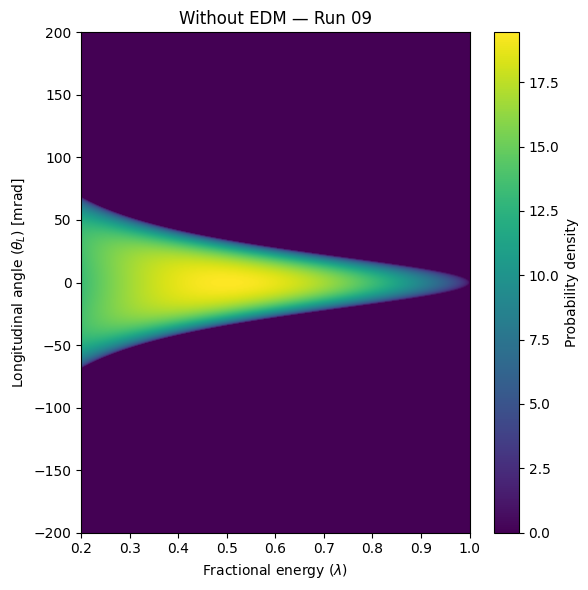

In [38]:
output_base = Path("outputs")

for edm_state in tqdm(["With", "Without"], desc="EDM States"):
    # Match the folder names on disk
    folder_name = "With EDM" if edm_state == "With" else "Without EDM"
    output_dir = output_base / folder_name
    output_dir.mkdir(parents=True, exist_ok=True)

    for run_id in range(29):
        subset = df_all.query("edm_state == @edm_state and run_id == @run_id")
        if subset.empty:
            print(f"Skipping {edm_state} run {run_id:02} — no data found.")
            continue

        # Get unique sorted axes
        lambdas = np.sort(subset["lambda_frac"].unique())
        thetas = np.sort(subset["theta_mrad"].unique())

        # Reshape back into 2D grid
        Z_grid = subset.pivot_table(
            index="theta_mrad",
            columns="lambda_frac",
            values="prob_density"
        ).values

        # File name format
        if edm_state == "With":
            fname = f"G2_{run_id:02}_withEDM_heatmap.png"
        else:
            fname = f"G2_{run_id:02}_heatmap.png"

        save_path = output_dir / fname

        # Plot and save with no inline output
        plt.figure(figsize=(6,6))
        plt.imshow(
            Z_grid,
            extent=[lambdas.min(), lambdas.max(), thetas.min(), thetas.max()],
            aspect='auto',
            origin='lower',
            cmap='viridis'
        )
        plt.xlabel(r"Fractional energy ($\lambda$)")
        plt.ylabel(r"Longitudinal angle ($\theta_L$) [mrad]")
        plt.title(f"{folder_name} — Run {run_id:02}")
        plt.colorbar(label="Probability density")
        plt.tight_layout()
        plt.savefig(save_path, dpi=200)
        plt.close()

        print(f"Saved: {save_path.resolve()}")


In [ ]:
target = 0.5
closest_idx = (df_all["lambda_frac"] - target).abs().idxmin()
closest_lambda = df_all.loc[closest_idx, "lambda_frac"]
print(closest_lambda)

0.4997995991983968


In [72]:
dftemp = df_all.query("edm_state == 'With' and run_id == 0 and lambda_frac==0.2")
dftemp.reset_index(drop=True, inplace=True)
dtheta = np.fabs(dftemp["theta_mrad"].loc[0] - dftemp["theta_mrad"].loc[1])

dftemp_theta = df_all.query("edm_state == 'With' and run_id == 0 and theta_mrad==200.0")
dftemp_theta.reset_index(drop=True, inplace=True)
dlambda = np.fabs(dftemp_theta["lambda_frac"].loc[0] - dftemp_theta["lambda_frac"].loc[1])

#for i in range(29):
#    dftemp = df_all.query(f"edm_state == 'With' and run_id == {i}")
#    print(i, dftemp["prob_density"].sum() * dtheta * dlambda * 1e-3)

lambda_values = np.linspace(0.2,0.95,10)
n_vals = [1, 10, 100, 1000, 2500, 5000, 7500, 10000]

metrics = {}

def CalculateMetrics(g, n):
    probs = n * g["prob_density"] * 1e-3
    theta = g["theta_mrad"]
    w_mean = np.sum(theta * probs) / np.sum(probs)
    w_var = np.sum(probs * theta**2) / np.sum(probs) - w_mean**2
    w_sem = np.sqrt(w_var) / np.sqrt(np.sum(probs))
    return pd.Series({"mean": w_mean, "wsig":np.sqrt(w_var), "sem": w_sem})

for n_curr in n_vals:
    all_metrics = []
    for lambda_curr in lambda_values:
        closest_idx = (df_all["lambda_frac"] - lambda_curr).abs().idxmin()
        closest_lambda = df_all.loc[closest_idx, "lambda_frac"]
        subset = df_all[df_all["lambda_frac"] == closest_lambda]
        results = (
        subset
        .groupby(["edm_state", "run_id"])
        .apply( lambda g: CalculateMetrics(g,n_curr))
        )

        angles = results.unstack("edm_state")

        means = results["mean"].unstack("edm_state")
        stddev = results["wsig"].unstack("edm_state")
        errors = results["sem"].unstack("edm_state")
        FOM = np.sum(means["With"]**2 / (2 * errors["With"]**2))
        all_metrics.append({
            "lambda_frac": lambda_curr,
            "FOM": FOM
        })

        # plt.figure(figsize=(7,5))
        # plt.title(fr"$\lambda$={lambda_curr}")
        # plt.errorbar(means.index, means["With"], yerr=errors["With"], fmt="o-", label="With EDM")
        # plt.errorbar(means.index, means["Without"], yerr=errors["Without"], fmt="s--", label="Without EDM")
        # plt.xlabel("Run ID")
        # plt.ylabel(r"$\langle\theta\rangle$ [mrad]")
        # plt.legend()
        # plt.grid(True)
        # plt.close()
        # plt.show()
    metrics[n_curr] = pd.DataFrame(all_metrics)


C:\Users\JakeS\AppData\Local\Temp\ipykernel_2816\1879826129.py:35: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply( lambda g: CalculateMetrics(g,n_curr))
C:\Users\JakeS\AppData\Local\Temp\ipykernel_2816\1879826129.py:35: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply( lambda g: CalculateMetrics(g,n_curr))
C:\Users\JakeS\AppData\Local\Temp\ipykernel_2816\1879826129.py:35: FutureWarning: DataFrameGroupBy.app

   lambda_frac       FOM
0     0.200000  0.029665
1     0.283333  0.041628
2     0.366667  0.050845
3     0.450000  0.056180
4     0.533333  0.057138
5     0.616667  0.052577
6     0.700000  0.043754
7     0.783333  0.030138
8     0.866667  0.015970
9     0.950000  0.003313
   lambda_frac       FOM
0     0.200000  0.296645
1     0.283333  0.416278
2     0.366667  0.508448
3     0.450000  0.561801
4     0.533333  0.571382
5     0.616667  0.525769
6     0.700000  0.437543
7     0.783333  0.301385
8     0.866667  0.159702
9     0.950000  0.033134
   lambda_frac       FOM
0     0.200000  2.966451
1     0.283333  4.162782
2     0.366667  5.084479
3     0.450000  5.618010
4     0.533333  5.713820
5     0.616667  5.257693
6     0.700000  4.375430
7     0.783333  3.013847
8     0.866667  1.597019
9     0.950000  0.331340
   lambda_frac        FOM
0     0.200000  29.664506
1     0.283333  41.627820
2     0.366667  50.844795
3     0.450000  56.180105
4     0.533333  57.138203
5     0.616667  52.

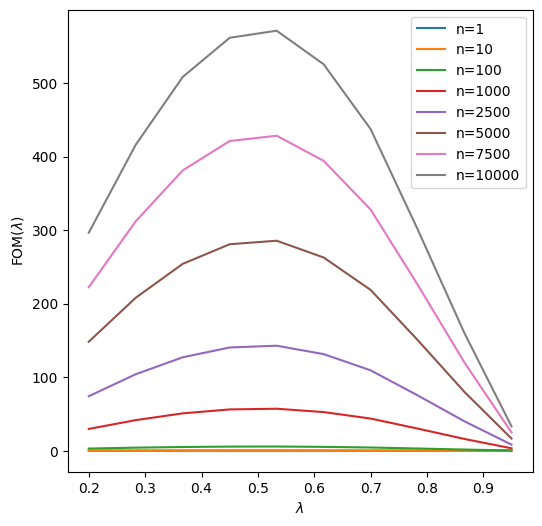

In [74]:
fig = plt.figure(figsize=(6,6))
for n_curr in n_vals:
    print(metrics[n_curr])
    plt.plot(metrics[n_curr]["lambda_frac"],metrics[n_curr]["FOM"],label=f"n={n_curr}")

plt.xlabel(r"$\lambda$")
plt.ylabel(r"FOM($\lambda$)")
plt.legend()
plt.show()